In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.graph_objects as go

In [180]:
diagnosis = pd.read_excel("Cancer Diagnosis CSV.xlsm", index_col = False)
additional_info = pd.read_excel("Cancer additional information CSV.xlsm", index_col = False)

In [168]:
diagnosis.head()

,Patient ID,Age,Gender,Tumour Class,Tumour Site,Initial Dosage,Missed Doses,Dosage Changes,Survived
0,234,7,Female,3,Pancreas,1569.375,4,2,1
1,255,61,Female,3,Pancreas,1010.625,0,2,0
2,706,58,Male,2,Pancreas,1300.000,0,0,0
3,1142,1,Female,2,Pancreas,1387.500,1,2,0
4,468,84,Male,1,Pancreas,1327.500,0,0,0


In [143]:
diagnosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1307 entries, 0 to 1306
Data columns (total 9 columns):
Patient ID        1307 non-null int64
Age               1307 non-null int64
Gender            1307 non-null object
Tumour Class      1307 non-null int64
Tumour Site       1307 non-null object
Initial Dosage    1307 non-null float64
Missed Doses      1307 non-null int64
Dosage Changes    1307 non-null int64
Survived          1307 non-null int64
dtypes: float64(1), int64(6), object(2)
memory usage: 92.0+ KB


TASK 1

change plots to plotly or dashboard
statistical test?
change string objects into numerical so i can analyse properly

In [14]:
#Check for null values
diagnosis.isnull().values.any()

False

In [127]:
#Check for duplicates
diagnosis.duplicated().value_counts()

False    1307
dtype: int64

In [15]:
#Look at statistical breakdown of data set
diagnosis.describe()

,Patient ID,Age,Tumour Class,Initial Dosage,Missed Doses,Dosage Changes,Survived
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,654.000000,44.061209,2.293803,1665.437368,0.498852,0.384851,0.261668
std,377.442711,19.368971,0.838022,2588.775314,1.042272,0.865990,0.439711
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,327.500000,33.000000,2.000000,394.790000,0.000000,0.000000,0.000000
50%,654.000000,42.000000,3.000000,722.710000,0.000000,0.000000,0.000000
75%,980.500000,52.000000,3.000000,1563.750000,1.000000,0.000000,1.000000
max,1307.000000,120.000000,3.000000,25616.460000,8.000000,9.000000,1.000000


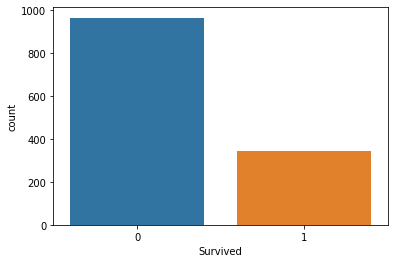

In [17]:
#Explore features
sns.countplot(diagnosis.Survived)

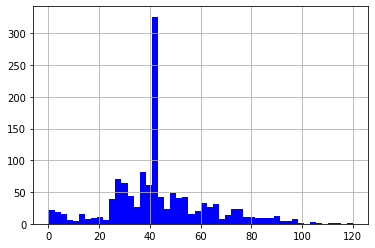

In [19]:
diagnosis['Age'].hist(bins = 50, color = 'blue')

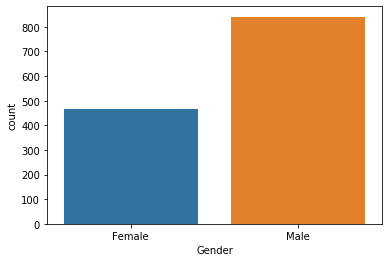

In [24]:
sns.countplot(diagnosis["Gender"])

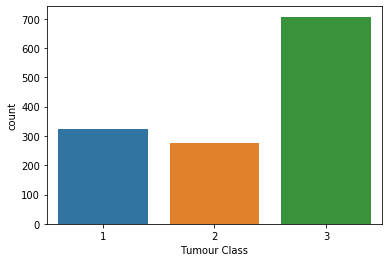

In [20]:
sns.countplot(diagnosis["Tumour Class"])

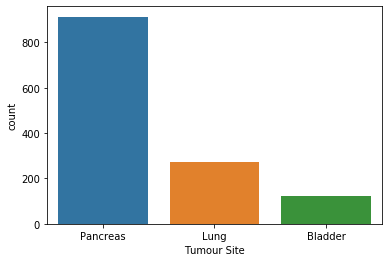

In [25]:
sns.countplot(diagnosis["Tumour Site"])

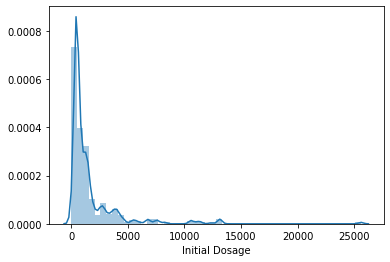

In [21]:
sns.distplot(diagnosis["Initial Dosage"])

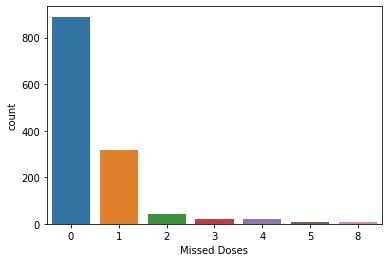

In [22]:
sns.countplot(diagnosis["Missed Doses"])

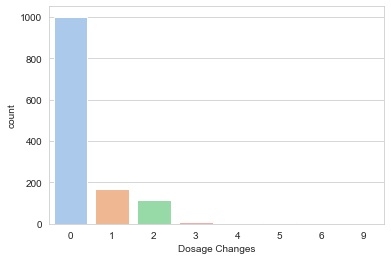

In [286]:
sns.countplot(diagnosis["Dosage Changes"])

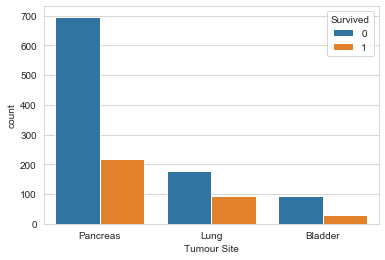

In [55]:
sns.countplot(hue = 'Survived', x = 'Tumour Site', data = diagnosis)

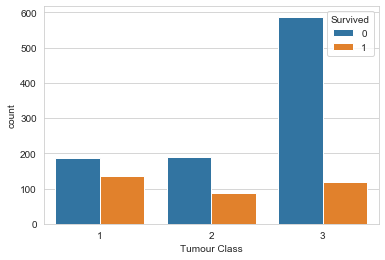

In [56]:
sns.countplot(hue = 'Survived', x = 'Tumour Class', data = diagnosis)

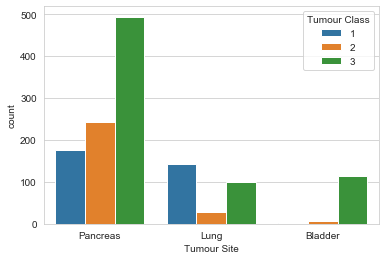

In [161]:
sns.countplot(hue = 'Tumour Class', x = 'Tumour Site', data = diagnosis)

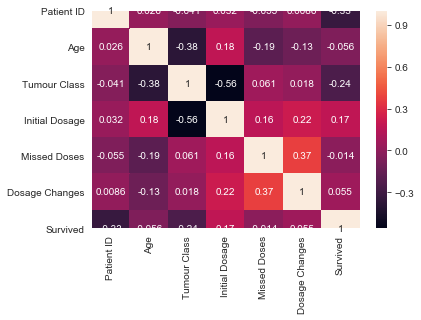

In [58]:
#Look at correlation of features
corr = diagnosis.corr()
sns.heatmap(corr, annot = True)

Tumour class and Initial dosage are highly negatively correlated. Tumour class and age, doasage changes and misses doses are also on the higher correlation. Survival doesnt appear to be highly correlated with any features, Tumour Class and Initial dosage being the highest correlations.

In [59]:
corr['Survived'].sort_values(ascending=False)

Survived          1.000000
Initial Dosage    0.173534
Dosage Changes    0.055059
Missed Doses     -0.014381
Age              -0.055735
Tumour Class     -0.244118
Patient ID       -0.330766
Name: Survived, dtype: float64

In [60]:
corr['Initial Dosage'].sort_values(ascending=False)

Initial Dosage    1.000000
Dosage Changes    0.221667
Age               0.177528
Survived          0.173534
Missed Doses      0.160294
Patient ID        0.032129
Tumour Class     -0.558596
Name: Initial Dosage, dtype: float64

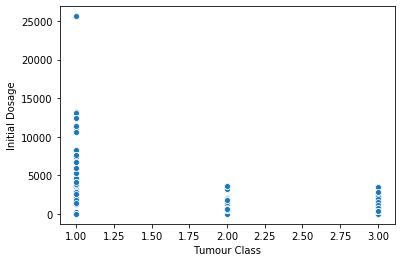

In [35]:
sns.scatterplot(x = 'Tumour Class', y = 'Initial Dosage', data = diagnosis)

We can see that the higher initial dosages are only given to tumour class 1. Drilling down further into this:

In [340]:
initial_dose = diagnosis.groupby("Initial Dosage").count()
initial_dose.nlargest(10)

TypeError: nlargest() missing 1 required positional argument: 'columns'

/Users/vajiha/miniconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/Users/vajiha/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/vajiha/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


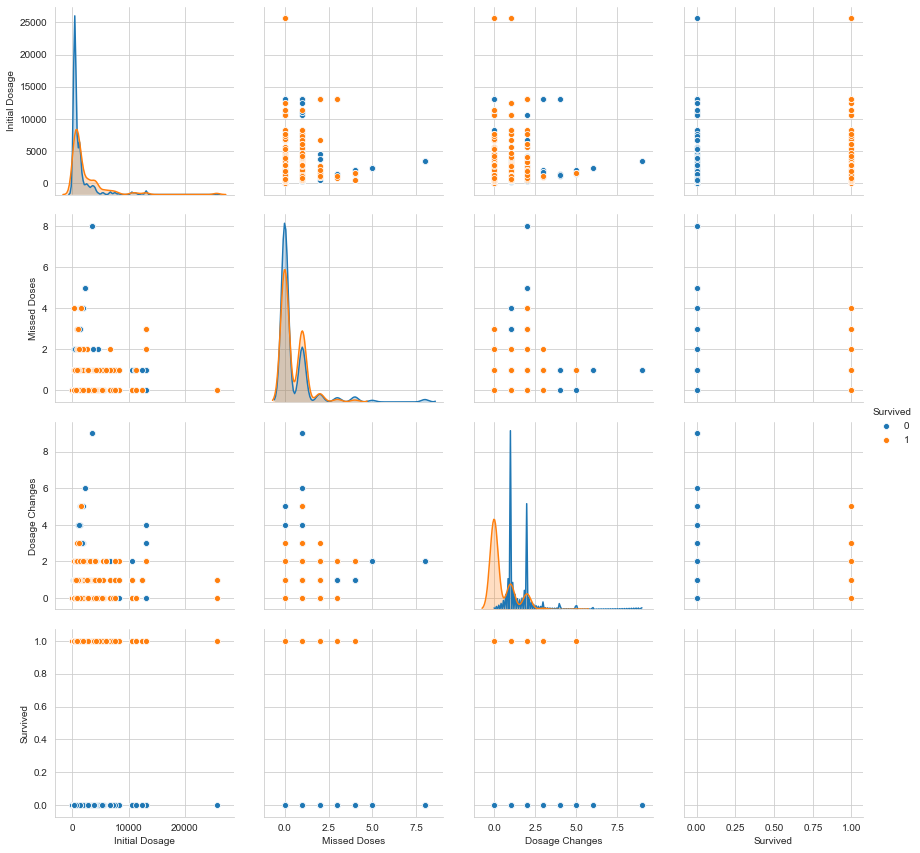

In [40]:
sns.set_style("whitegrid");

sns.pairplot(diagnosis,hue='Survived',size=3,vars=["Initial Dosage", "Missed Doses","Dosage Changes", "Survived"])

In [ ]:
#Outliers


In [43]:
#look at those who didnt get given any drug - placebo. 
#Create df for placebo and check that 
placebo = diagnosis[diagnosis["Initial Dosage"] == 0]
placebo

,Patient ID,Age,Gender,Tumour Class,Tumour Site,Initial Dosage,Missed Doses,Dosage Changes,Survived
120,278,42,Male,2,Pancreas,0.0,0,0,0
173,414,42,Male,2,Pancreas,0.0,0,0,0
209,1264,73,Male,1,Pancreas,0.0,0,0,0
218,598,73,Male,3,Pancreas,0.0,0,0,0
261,675,42,Male,2,Pancreas,0.0,0,0,0
283,807,58,Male,1,Pancreas,0.0,0,0,0
598,823,57,Male,1,Pancreas,0.0,0,0,0
632,1158,42,Male,1,Pancreas,0.0,0,0,0
651,303,28,Male,3,Pancreas,0.0,0,0,0
697,180,54,Male,3,Pancreas,0.0,0,0,0


In [45]:
placebo.shape

(17, 9)

19 subjects were in the placebo group, of which 1 survived. However, they were all male and all cancer of the pancreatic site.

In [200]:
pancreas = diagnosis[diagnosis["Tumour Site"] == "Pancreas"]
lung = diagnosis[diagnosis["Tumour Site"] == "Lung"]
bladder = diagnosis[diagnosis["Tumour Site"] == "Bladder"]

pancreas

,Patient ID,Age,Gender,Tumour Class,Tumour Site,Initial Dosage,Missed Doses,Dosage Changes,Survived
0,234,7,Female,3,Pancreas,1569.375,4,2,1
1,255,61,Female,3,Pancreas,1010.625,0,2,0
2,706,58,Male,2,Pancreas,1300.000,0,0,0
3,1142,1,Female,2,Pancreas,1387.500,1,2,0
4,468,84,Male,1,Pancreas,1327.500,0,0,0
...,...,...,...,...,...,...,...,...,...
1298,1215,49,Male,1,Pancreas,1327.500,0,0,0
1299,478,43,Male,3,Pancreas,352.290,1,0,0
1300,931,42,Male,3,Pancreas,2824.790,0,0,0
1304,1054,39,Female,2,Pancreas,675.000,0,0,0


In [ ]:
#Check values for initial dosage to see if we can segment them.
#eg highest levels of dosage - who were they given to?

TASK 2 - LINKAGE OF DATA

In [144]:
additional_info.head()

,Number of Months,Unnamed: 1,Previous Diagnosis,Private Health
0,7,NHS 817,0,0
1,4,NHS 532,0,1
2,4,NHS 1032,0,0
3,4,NHS 77,0,1
4,Not Known,NHS 541,1,1


In [145]:
additional_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 4 columns):
Number of Months      1309 non-null object
Unnamed: 1            1309 non-null object
Previous Diagnosis    1309 non-null int64
Private Health        1309 non-null int64
dtypes: int64(2), object(2)
memory usage: 41.0+ KB


In [146]:
additional_info.shape

(1309, 4)

In [147]:
#Check for null values
additional_info.isnull().values.any()

False

In [181]:
#Check for duplicates
additional_info.duplicated().value_counts()

False    1257
True       52
dtype: int64

In [182]:
#drop duplicates
additional_info= additional_info.drop_duplicates()

Issues with data set:
- No title for column Patient ID - had to add this in
- Patient ID in different format to other sheet - had to edit this
- Missing info in number of months - "Not Known". I could impute this with average of others, linking to tumour site and tumour class
- Extra blank column not needed - not a problem in python
- 1307 in first data set, 1309 in second data set - when merging, turns out there were patients on both data sets that werent on both. So to use the data effectively, should delete the records with NaN values (if we want to use the deleted values, we can use the other 2 data sets separately to use them explicitly) 
- 52 duplicates. removed these. 1257 results in both data sets.
- When merging on the Patient ID column, ran into problems because they are both different data types, int64 and object type, so had to convert second df column into integer

Do I need to be able to explain how to do all this in excel/SQL too?

How I merged data - after cleaning as above:


In [183]:
#Rename column name
additional_info.rename(columns = {"Unnamed: 1": "Patient ID"}, inplace=True)

#Edit format of patient ID
additional_info["Patient ID"] = additional_info["Patient ID"].str.split(' ').str.get(1)

In [184]:
additional_info

,Number of Months,Patient ID,Previous Diagnosis,Private Health
0,7,817,0,0
1,4,532,0,1
2,4,1032,0,0
3,4,77,0,1
4,Not Known,541,1,1
...,...,...,...,...
1304,Not Known,528,1,1
1305,3,1059,0,1
1306,5,417,1,0
1307,10,350,1,0


In [185]:
#Check if Patient ID are in both:
diagnosis.assign(Inadditional_info=diagnosis["Patient ID"].isin(additional_info["Patient ID"]).astype(int))

,Patient ID,Age,Gender,Tumour Class,Tumour Site,Initial Dosage,Missed Doses,Dosage Changes,Survived,Inadditional_info
0,234,7,Female,3,Pancreas,1569.375,4,2,1,1
1,255,61,Female,3,Pancreas,1010.625,0,2,0,1
2,706,58,Male,2,Pancreas,1300.000,0,0,0,0
3,1142,1,Female,2,Pancreas,1387.500,1,2,0,1
4,468,84,Male,1,Pancreas,1327.500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1302,1296,64,Male,1,Lung,1386.040,1,0,0,1
1303,994,42,Male,3,Bladder,387.500,0,0,0,1
1304,1054,39,Female,2,Pancreas,675.000,0,0,0,0
1305,558,42,Male,1,Lung,11376.250,0,0,0,1


In [186]:
#Merge dataframes
additional_info["Patient ID"]=additional_info["Patient ID"].astype(int)
new_df = pd.merge(diagnosis, additional_info, how="outer")

new_df.shape

(1307, 12)

In [187]:
new_df.head()

,Patient ID,Age,Gender,Tumour Class,Tumour Site,Initial Dosage,Missed Doses,Dosage Changes,Survived,Number of Months,Previous Diagnosis,Private Health
0,234,7,Female,3,Pancreas,1569.375,4,2,1,7,0.0,0.0
1,255,61,Female,3,Pancreas,1010.625,0,2,0,9,1.0,1.0
2,706,58,Male,2,Pancreas,1300.000,0,0,0,NaN,NaN,NaN
3,1142,1,Female,2,Pancreas,1387.500,1,2,0,4,0.0,1.0
4,468,84,Male,1,Pancreas,1327.500,0,0,0,NaN,NaN,NaN


In [188]:
#Rather than fill values with mean of columns, will deal with the missing values by dropping them.
new_df = new_df.dropna()
new_df.shape

(1257, 12)

In [327]:
#50 values have been dropped

new_df.head()

,Patient ID,Age,Gender,Tumour Class,Tumour Site,Initial Dosage,Missed Doses,Dosage Changes,Survived,Number of Months,Previous Diagnosis,Private Health
0,234,7,1,3,0,1569.375,4,2,1,7,0.0,0.0
1,255,61,1,3,0,1010.625,0,2,0,9,1.0,1.0
3,1142,1,1,2,0,1387.500,1,2,0,4,0.0,1.0
5,529,58,0,3,0,396.250,0,0,0,9,0.0,1.0
6,540,33,1,1,2,2475.000,0,2,1,Not Known,0.0,1.0


In [331]:
prev_diag = new_df[(new_df["Previous Diagnosis"] == 0) & (new_df["Survived"] == 0)].count()
prev_diag

Patient ID            472
Age                   472
Gender                472
Tumour Class          472
Tumour Site           472
Initial Dosage        472
Missed Doses          472
Dosage Changes        472
Survived              472
Number of Months      472
Previous Diagnosis    472
Private Health        472
dtype: int64

TASK 3 

train_data.Cabin.value_counts()
full_data.isnull().sum().sort_values(ascending = False)

plt.figure(figsize = (16, 8))

sns.distplot(full_data["Age"])
plt.title("Age Distribution")
plt.xlabel("Age")
plt.show()

In [190]:
#Turn strings into numerical data
new_df["Gender"] = new_df["Gender"].map({"Male": "0", "Female":"1"})
new_df["Tumour Site"] = new_df["Tumour Site"].map({"Pancreas": "0", "Bladder":"1", "Lung":"2"})
new_df["Gender"] = new_df["Gender"].astype(int)
new_df["Tumour Site"] = new_df["Tumour Site"].astype(int)

(11.0, 0.0)

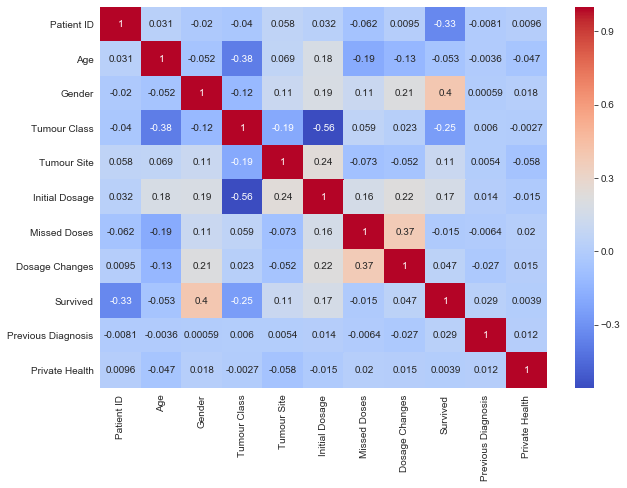

In [198]:
#Correlation
correlation = new_df.corr()
plt.subplots(figsize=(10,7))
ax = sns.heatmap(correlation, cmap='coolwarm', annot = True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The additional info doesnt seemto have any significant correlation on survival.

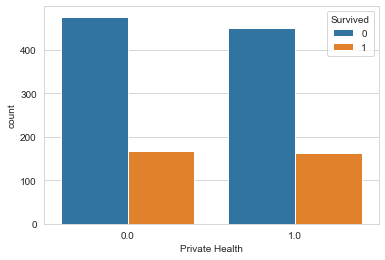

In [160]:
sns.countplot(hue = 'Survived', x = 'Private Health', data = new_df)

In [301]:
private_survived = new_df[(new_df["Private Health"]==1) & (new_df["Survived"]==1)].count()
private_no_survived = new_df[(new_df["Private Health"]==1) & (new_df["Survived"]==0)].count()
no_private_survived = new_df[(new_df["Private Health"]==0) & (new_df["Survived"]==1)].count()
no_private_no_survived = new_df[(new_df["Private Health"]==0) & (new_df["Survived"]==0)].count()

In [300]:


private = ["private", "not private"]
fig = go.Figure(data=[
    go.Bar(name='Survived', x=private, y=[162,168]),
    go.Bar(name='Not Survived', x=private, y=[451, 476])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [202]:
tumour_site = diagnosis.groupby('Tumour Site').count()

tumour_site

,Patient ID,Age,Gender,Tumour Class,Initial Dosage,Missed Doses,Dosage Changes,Survived
Tumour Site,,,,,,,,
Bladder,123,123,123,123,123,123,123,123
Lung,271,271,271,271,271,271,271,271
Pancreas,913,913,913,913,913,913,913,913


In [204]:
tumour_class = diagnosis.groupby('Tumour Class')["Tumour Site"].count()
tumour_class

Tumour Class
1    323
2    277
3    707
Name: Tumour Site, dtype: int64

In [229]:
class_one = diagnosis[diagnosis["Tumour Class"] == 1]
class_one_count = class_one.groupby('Tumour Site')["Patient ID"].count().reset_index()

class_two = diagnosis[diagnosis["Tumour Class"] == 2]
class_two_count = class_two.groupby('Tumour Site')["Patient ID"].count().reset_index()

class_three = diagnosis[diagnosis["Tumour Class"] == 3]
class_three_count = class_three.groupby('Tumour Site')["Patient ID"].count().reset_index()

trace1= go.Bar( x = class_one_count['Tumour Site'],  #Create trace using the dataframe columns
             y= class_one_count['Patient ID'],
             name = 'Class 1' #Name that will show in legend
            )

trace2= go.Bar( x = class_two_count['Tumour Site'],  #Create trace using the dataframe columns
             y= class_two_count['Patient ID'],
             name = 'Class 2' #Name that will show in legend
             )

trace3= go.Bar( x = class_three_count['Tumour Site'],  #Create trace using the dataframe columns
             y= class_three_count['Patient ID'],
             name = 'Class 3' #Name that will show in legend
             )


layout = go.Layout(barmode = "group", title='Tumour Class by Site',
                   xaxis= dict(title= 'Tumour Site',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'No of patients',ticklen= 5,zeroline= False),
                   plot_bgcolor = 'rgb(230,230,230)',
                   showlegend=True)

data = [trace1, trace2, trace3]
fig = go.Figure(data = data,layout = layout) #Create figure
#xaxis=[class_one_count['Tumour Site'],class_two_count['Tumour Site'],class_three_count['Tumour Site']]
#fig.add_trace(go.Scatter( x = [xaxis],
 #                        y = [1,2,27,61,9,25, 74, 76, 67] ))
fig.show()

In [230]:
import plotly.graph_objects as go
gender=['male', 'female']

fig = go.Figure(data=[
    go.Bar(name='Survived', x=gender, y=[109,233]),
    go.Bar(name='Not Survived', x=gender, y=[732,233])
])
# Change the bar mode
fig.update_layout(barmode='stack')
fig.show()

In [231]:
import plotly.express as px
df = diagnosis
fig = px.histogram(df, x="Age", color="Survived")
fig.show()

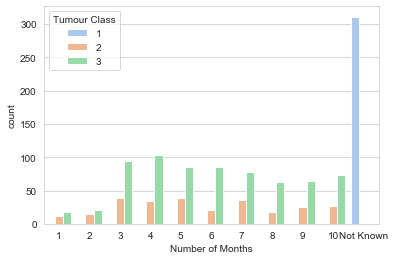

In [284]:
sns.countplot(hue = 'Tumour Class', x = 'Number of Months', data = new_df, order = [1,2,3,4,5,6,7,8,9,10,"Not Known"])

In [317]:
#No of months before diagnosis.
fig = px.histogram(new_df, x="Number of Months", color="Survived", 
                   marginal="box", # or violin, rug
                  ) 
fig.update_layout(barmode='group')
fig.show()


In [318]:
fig = px.histogram(new_df, x="Number of Months", color="Private Health", 
                   marginal="box", # or violin, rug
                  ) 
fig.update_layout(barmode='group')
fig.show()


In [325]:
fig = px.histogram(new_df, x="Survived", color = "Previous Diagnosis")
fig.update_layout(barmode='group')
fig.show()

In [282]:
df = new_df
fig = px.scatter(df, x="Initial Dosage", color="Survived",
                 size='Dosage Changes')
fig.show()

In [244]:
fig = px.box(new_df, x="Tumour Class", y="Initial Dosage")
fig.show()

In [247]:
fig = px.bar(new_df, x="Private Health", y="Survived")
fig.show()